In [42]:
#Penerapan Algoritma DBSCAN Only

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from itertools import product

In [43]:
filelocation = 'C:/Users/User/Documents/Berkas Fikar/Skripsi Fikar/Database/pca_sekolah_sulsel.csv'
data = pd.read_csv(filelocation)

In [44]:
data.head()

,pca1,pca2
0,1.628340,3.349251
1,1.781699,6.710388
2,1.373750,3.268771
3,2.638114,3.056547
4,0.434320,3.433142


In [45]:
features = ['pca1', 'pca2']
x1 = data.loc[:100, features].values

In [46]:
nn = NearestNeighbors(n_neighbors=2)
nbrs = nn.fit(x1)
distances,indices=nbrs.kneighbors(x1)

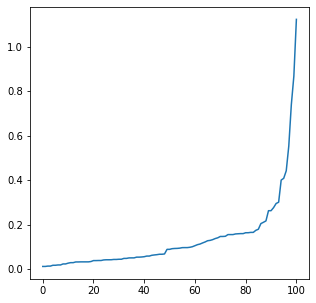

In [47]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.rcParams['figure.figsize'] = (5,5)
plt.plot(distances)
plt.show()

In [48]:
x = data.loc[:, features].values
dbscan = DBSCAN(eps=0.7, min_samples=7).fit(x)
labels = dbscan.labels_

In [49]:
print("klaster total:{}".format(len(set(labels[np.where(labels!=-1)]))))
print(labels)

klaster total:4
[0 1 0 ... 1 1 2]


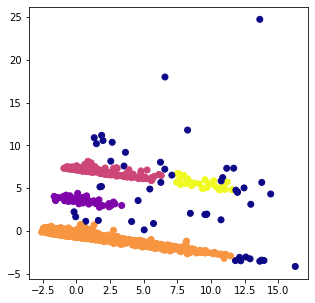

In [50]:
plt.scatter(x[:,0], x[:,1], c=labels, cmap="plasma")
plt.show()

In [51]:
klaster = pd.DataFrame(data = labels, columns = ['dbscanonly_kluster'])
klaster

,dbscanonly_kluster
0,0
1,1
2,0
3,0
4,0
...,...
9196,1
9197,3
9198,1
9199,1


In [52]:
from sklearn.metrics import silhouette_samples, silhouette_score
SI = silhouette_score(data, labels)
print(SI)

0.667756759373751


In [53]:
if 'dbscanonly_kluster' in data.columns:

    data_simplification = data[data['dbscanonly_kluster'] != -1]

    print("Data Setelah Penyederhanaan :")
    print(data_simplification.head())
else :
    print("kolom 'dbscanonly_kluster' tidak ditemukan dalam data.")

kolom 'dbscanonly_kluster' tidak ditemukan dalam data.


In [56]:
klaster[klaster['dbscanonly_kluster'] == -1].count()

dbscanonly_kluster    51
dtype: int64

In [57]:
datasekolah = pd.read_csv('C:/Users/User/Documents/Berkas Fikar/Skripsi Fikar/Database/data_gabungan_sekolah_sulsel.csv')

In [58]:
hasil1 = pd.concat([data, pd.DataFrame(klaster)],axis=1)
hasil2 = pd.concat([datasekolah, pd.DataFrame(hasil1)],axis=1)
hasil2.to_csv('data_dari_dbscan.csv', index = False)
hasil2

,No,Nama Sekolah,BP,Status,siswa_total,jumlah_guru,staf_total,jumlah_ruangan,daya_listrik,wilayah_total,skor_akreditasi,Lintang,Bujur,pca1,pca2,dbscanonly_kluster
0,1,UPT SPF SD INPRES BADDOKA,SD,Negeri,337,18,3,13,1300,2808,81,509153567,1195133502,1.628340,3.349251,0
1,2,UPT SPF SD INPRES BAKUNG 1,SD,Negeri,243,15,4,8,900,3000,84,5073361105,1195294071,1.781699,6.710388,1
2,3,UPT SPF SD INPRES BAKUNG 2,SD,Negeri,269,16,5,8,4400,2500,84,5079140801,119529189,1.373750,3.268771,0
3,4,UPT SPF SD INPRES DAYA,SD,Negeri,498,28,3,13,4640,1200,87,5112902708,119512008,2.638114,3.056547,0
4,5,UPT SPF SD INPRES KALANG TUBUNG 2,SD,Negeri,195,15,1,8,1300,1505,81,5080894528,119536749,0.434320,3.433142,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9196,9197,SMKS YPLP PGRI 1 MAKASSAR,SMK,Swasta,191,12,5,14,10600,3482,84,5183308565,1194176927,2.215221,6.915696,1
9197,9198,SMKN 7 MAKASSAR,SMK,Negeri,984,71,5,35,3400,5474,84,5138319766,1194119229,8.545746,5.302014,3
9198,9199,SMKS GLOBAL ENTREPRENEUR,SMK,Swasta,0,0,1,0,5600,2700,76,5145518711,1194164773,-0.665992,7.397538,1
9199,9200,SMK KESEHATAN TNI AL MAKASSAR,SMK,Swasta,22,5,1,5,2200,10396,91,5115569448,1194173205,0.133514,7.232193,1
